[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/guilbera/colorizing/blob/main/notebooks/utilities/pix.ipynb)

In [ ]:
import os
import shutil
from zipfile import ZipFile
import numpy as np

In [ ]:
from skimage.color import rgb2lab, lab2rgb

In [ ]:
def copy_dataset(path):
  'copy and unzip dataset from path e.g. from my drive when mounted in google colab'
  zip_file = path.split('/')[-1]
  dataset_name = zip_file.split('.zip')[0]
  if not os.path.exists('/content/'+zip_file) and not os.path.exists('/content/dataset/'):
    shutil.copy(path, '/content/')

  if not os.path.exists('/content/dataset/'):
    with ZipFile('/content/'+zip_file,'r') as zip_ref:
        zip_ref.extractall('/content/dataset/')
  
  if os.path.exists('/content/'+zip_file):
    os.remove('/content/'+zip_file)

**rgb2lab: [0,1]x[0,1]x[0,1] -> [0,100] x [-128,128] x [-128,128]
lab2rgb: [0,100] x [-128,128] x [-128,128] -> [0,1]x[0,1]x[0,1]**

In [ ]:
def rgb_to_lab(rgb):
    ' transform a PIL RGB image into a Lab tensor '
    img = rgb2lab(rgb).astype('float32')
    L = (img[...,0:1]/50.)-1. #[0,100] -> [-1,1]
    ab = img[...,1:]/128 #[-128,128] -> [-1,1]
    return {'L': L, 'ab': ab}

In [ ]:
def lab_to_rgb(L, ab):  
    ' to be transferable between keras and pytorch, L and ab are numpy arrays of form [B, H, W ,C]'
    L = (L + 1.) * 50. #[-1,1] -> [0,100]
    ab = ab * 128. #[-1,1] -> [-128,128]
    Lab = np.concatenate((L,ab), axis=3)
    rgb_imgs = []
    for img in Lab:
        img_rgb = lab2rgb(img)
        rgb_imgs.append(img_rgb)
    return np.stack(rgb_imgs, axis=0)

### **Example on how to use the rgb_to_lab and lab_to_rgb functions**

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

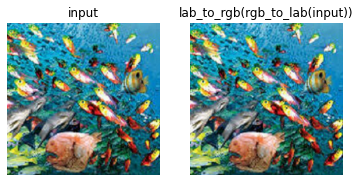

In [ ]:
img_loc = '/content/fish.jpg'
if os.path.exists(img_loc):
  #open the image in RGB
  img = Image.open(img_loc).convert('RGB')
  #convert to Lab
  img_lab = rgb_to_lab(img)
  #convert to the [B,H,W,C] format
  L = np.expand_dims(img_lab['L'],0)
  ab = np.expand_dims(img_lab['ab'],0)
  #convert back to RGB
  img_rgb = lab_to_rgb(L,ab)
  #plot
  fig, axs = plt.subplots(1,2)
  axs[0].imshow(img)
  axs[0].set_title('input')
  axs[0].axis('off')
  axs[1].imshow(img_rgb[0])
  axs[1].set_title('lab_to_rgb(rgb_to_lab(input))')
  axs[1].axis('off')